<div style="text-align: center"><H1>CTIC - UNIVERSIDAD NACIONAL DE INGENIERIA</H1> </div>
<img src="LogoUNI_small2.png">
<div style="text-align: center"><H1>Ciencia de Datos</H1> </div>
<div style="text-align: center"><H2>Introducción al Proceso Análisis y Exploración de Datos</H2> </div>
<div style="text-align: center"><H3>Profesor: Juan Luis Herencia Guerra</H3> </div>
<div style="text-align: right"><H4>22 de mayo de 2022</H4> </div>

In [1]:
import pandas as pd

In [2]:
df_fallecidos = pd.read_csv('fallecidos_covid.csv', sep = ';')
df_fallecidos

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220415,20210512,88,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0
1,20220415,20210401,72,FEMENINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889746.0
2,20220415,20210624,58,MASCULINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0
3,20220415,20210426,84,MASCULINO,Criterio serolÃ³gico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0
4,20220415,20210315,64,MASCULINO,Criterio virolÃ³gico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0
...,...,...,...,...,...,...,...,...,...,...
212614,20220415,20200523,1,MASCULINO,Criterio clÃ­nico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,NaN
212615,20220415,20211003,30,FEMENINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN
212616,20220415,20200918,66,FEMENINO,Criterio radiolÃ³gico,PIURA,MORROPON,LA MATANZA,200404,NaN
212617,20220415,20200510,60,MASCULINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN


In [3]:
df_fallecidos.shape

(212619, 10)

In [4]:
df_fallecidos.index

RangeIndex(start=0, stop=212619, step=1)

In [5]:
df_fallecidos.columns

Index(['FECHA_CORTE', 'FECHA_FALLECIMIENTO', 'EDAD_DECLARADA', 'SEXO',
       'CLASIFICACION_DEF', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'UUID'],
      dtype='object')

In [6]:
df_fallecidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212619 entries, 0 to 212618
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          212619 non-null  int64  
 1   FECHA_FALLECIMIENTO  212619 non-null  int64  
 2   EDAD_DECLARADA       212619 non-null  int64  
 3   SEXO                 212619 non-null  object 
 4   CLASIFICACION_DEF    212619 non-null  object 
 5   DEPARTAMENTO         212619 non-null  object 
 6   PROVINCIA            212614 non-null  object 
 7   DISTRITO             212614 non-null  object 
 8   UBIGEO               212619 non-null  object 
 9   UUID                 210017 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 16.2+ MB


In [9]:
# Verificando si faltan valores
df_fallecidos.isna().sum()

FECHA_CORTE               0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
CLASIFICACION_DEF         0
DEPARTAMENTO              0
PROVINCIA                 5
DISTRITO                  5
UBIGEO                    0
UUID                   2602
dtype: int64

In [10]:
df_fallecidos.groupby(['DEPARTAMENTO']).count()[['UUID']]

,UUID
DEPARTAMENTO,
AMAZONAS,1311
ANCASH,7080
APURIMAC,1626
AREQUIPA,10236
AYACUCHO,2316
CAJAMARCA,4438
CALLAO,10368
CUSCO,5130
HUANCAVELICA,1266


Text(0, 0.5, 'FALLECIDOS')

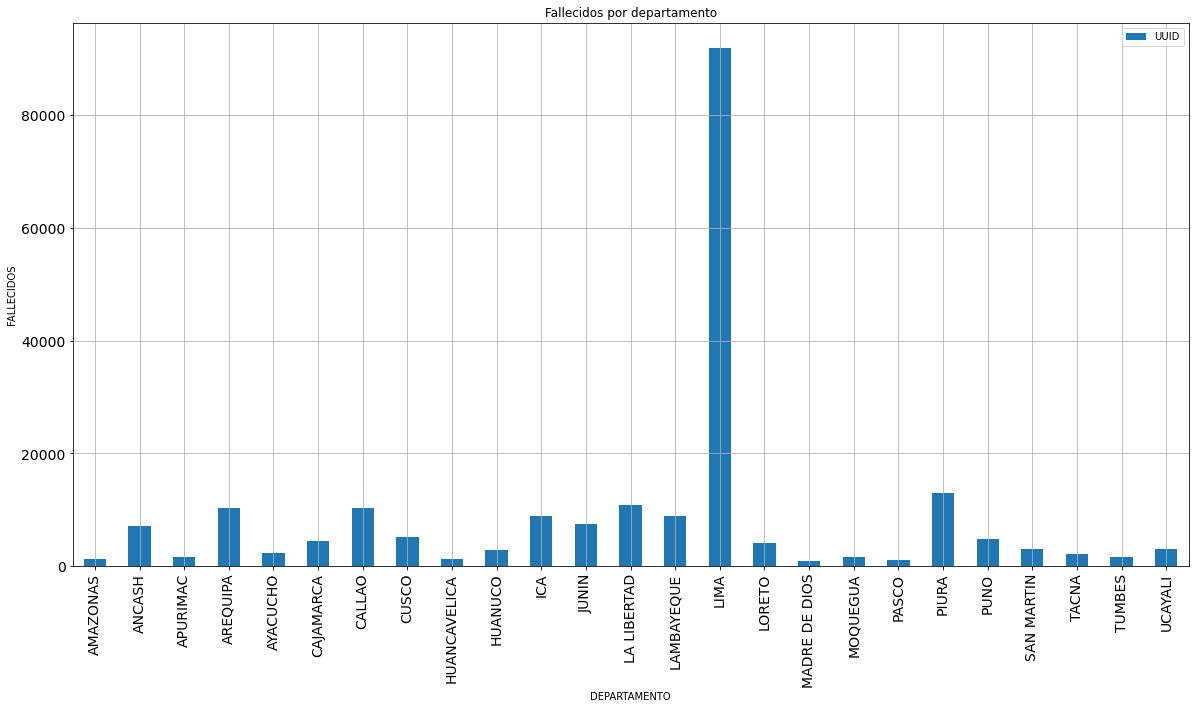

In [11]:
ax = df_fallecidos.groupby(['DEPARTAMENTO']).count()[['UUID']].plot(kind = 'bar', figsize=(20,10), grid=True, fontsize = 14, 
                                                               title = 'Fallecidos por departamento')
ax.set_ylabel('FALLECIDOS')

In [12]:
df_fallecidos.pivot_table(index=['PROVINCIA'], columns=['FECHA_FALLECIMIENTO'], aggfunc = {'UUID':'count'}, fill_value = 0)

UUID                                               \
FECHA_FALLECIMIENTO 20200303 20200304 20200307 20200308 20200311 20200314   
PROVINCIA                                                                   
ABANCAY                    0        0        0        0        0        0   
ACOBAMBA                   0        0        0        0        0        0   
ACOMAYO                    0        0        0        0        0        0   
AIJA                       0        0        0        0        0        0   
ALTO AMAZONAS              0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
YAULI                      0        0        0        0        0        0   
YAUYOS                     0        0        0        0        0        0   
YUNGAY                     0        0        0        0        0        0   
YUNGUYO                    0        0        0        0        0        0   
ZARUMILLA                  0        0        0        0        0        0   

                                                         ...           \
FECHA_FALLECIMIENTO 20200316 20200317 20200318 20200319  ... 20220406   
PROVINCIA                                                ...            
ABANCAY                    0        0        0        0  ...        0   
ACOBAMBA                   0        0        0        0  ...        0   
ACOMAYO                    0        0        0        0  ...        0   
AIJA                       0        0        0        0  ...        0   
ALTO AMAZONAS              0        0        0        0  ...        0   
...                      ...      ...      ...      ...  ...      ...   
YAULI                      0        0        0        0  ...        0   
YAUYOS                     0        0        0        0  ...        0   
YUNGAY                     0        0        0        0  ...        0   
YUNGUYO                    0        0        0        0  ...        0   
ZARUMILLA                  0        0        0        0  ...        0   

                                                                           \
FECHA_FALLECIMIENTO 20220407 20220408 20220409 20220410 20220411 20220412   
PROVINCIA                                                                   
ABANCAY                    0        0        0        0        0        0   
ACOBAMBA                   0        0        0        0        1        0   
ACOMAYO                    0        0        0        0        0        0   
AIJA                       0        0        0        0        0        0   
ALTO AMAZONAS              0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
YAULI                      0        0        0        0        0        1   
YAUYOS                     0        0        0        0        0        0   
YUNGAY                     0        0        0        0        0        1   
YUNGUYO                    0        0        0        0        0        0   
ZARUMILLA                  0        0        0        0        0        0   

                                                
FECHA_FALLECIMIENTO 20220413 20220414 20220415  
PROVINCIA                                       
ABANCAY                    0        0        0  
ACOBAMBA                   0        0        0  
ACOMAYO                    0        0        0  
AIJA                       0        0        0  
ALTO AMAZONAS              0        0        0  
...                      ...      ...      ...  
YAULI                      0        1        0  
YAUYOS                     0        0        0  
YUNGAY                     0        0        0  
YUNGUYO                    1        0        0  
ZARUMILLA                  0        0        0  

[196 rows x 767 columns]

In [13]:
df_fallecidos.pivot_table(index=['PROVINCIA'], columns=['FECHA_FALLECIMIENTO'], aggfunc = {'UUID':'count'}, fill_value = 0).transpose()

PROVINCIA                 ABANCAY  ACOBAMBA  ACOMAYO  AIJA  ALTO AMAZONAS  \
     FECHA_FALLECIMIENTO                                                    
UUID 20200303                   0         0        0     0              0   
     20200304                   0         0        0     0              0   
     20200307                   0         0        0     0              0   
     20200308                   0         0        0     0              0   
     20200311                   0         0        0     0              0   
...                           ...       ...      ...   ...            ...   
     20220411                   0         1        0     0              0   
     20220412                   0         0        0     0              0   
     20220413                   0         0        0     0              0   
     20220414                   0         0        0     0              0   
     20220415                   0         0        0     0              0   

PROVINCIA                 AMBO  ANDAHUAYLAS  ANGARAES  ANTA  ANTABAMBA  ...  \
     FECHA_FALLECIMIENTO                                                ...   
UUID 20200303                0            0         0     0          0  ...   
     20200304                0            0         0     0          0  ...   
     20200307                0            0         0     0          0  ...   
     20200308                0            0         0     0          0  ...   
     20200311                0            0         0     0          0  ...   
...                        ...          ...       ...   ...        ...  ...   
     20220411                0            0         0     0          0  ...   
     20220412                0            0         0     0          0  ...   
     20220413                0            0         0     0          0  ...   
     20220414                0            1         0     0          0  ...   
     20220415                0            0         0     0          0  ...   

PROVINCIA                 UTCUBAMBA  VICTOR FAJARDO  VILCAS HUAMAN  VIRU  \
     FECHA_FALLECIMIENTO                                                   
UUID 20200303                     0               0              0     0   
     20200304                     0               0              0     0   
     20200307                     0               0              0     0   
     20200308                     0               0              0     0   
     20200311                     0               0              0     0   
...                             ...             ...            ...   ...   
     20220411                     0               0              0     0   
     20220412                     0               0              0     0   
     20220413                     0               0              0     0   
     20220414                     0               0              0     0   
     20220415                     0               1              0     1   

PROVINCIA                 YAROWILCA  YAULI  YAUYOS  YUNGAY  YUNGUYO  ZARUMILLA  
     FECHA_FALLECIMIENTO                                                        
UUID 20200303                     0      0       0       0        0          0  
     20200304                     0      0       0       0        0          0  
     20200307                     0      0       0       0        0          0  
     20200308                     0      0       0       0        0          0  
     20200311                     0      0       0       0        0          0  
...                             ...    ...     ...     ...      ...        ...  
     20220411                     0      0       0       0        0          0  
     20220412                     0      1       0       1        0          0  
     20220413                     0      0       0       0        1          0  
     20220414                     0      1       0       0        0          0  
     2022

In [14]:
df_por_prov = df_fallecidos.pivot_table(index=['PROVINCIA'], columns=['FECHA_FALLECIMIENTO'], aggfunc = {'UUID':'count'}, fill_value = 0).transpose()
df_por_prov

PROVINCIA                 ABANCAY  ACOBAMBA  ACOMAYO  AIJA  ALTO AMAZONAS  \
     FECHA_FALLECIMIENTO                                                    
UUID 20200303                   0         0        0     0              0   
     20200304                   0         0        0     0              0   
     20200307                   0         0        0     0              0   
     20200308                   0         0        0     0              0   
     20200311                   0         0        0     0              0   
...                           ...       ...      ...   ...            ...   
     20220411                   0         1        0     0              0   
     20220412                   0         0        0     0              0   
     20220413                   0         0        0     0              0   
     20220414                   0         0        0     0              0   
     20220415                   0         0        0     0              0   

PROVINCIA                 AMBO  ANDAHUAYLAS  ANGARAES  ANTA  ANTABAMBA  ...  \
     FECHA_FALLECIMIENTO                                                ...   
UUID 20200303                0            0         0     0          0  ...   
     20200304                0            0         0     0          0  ...   
     20200307                0            0         0     0          0  ...   
     20200308                0            0         0     0          0  ...   
     20200311                0            0         0     0          0  ...   
...                        ...          ...       ...   ...        ...  ...   
     20220411                0            0         0     0          0  ...   
     20220412                0            0         0     0          0  ...   
     20220413                0            0         0     0          0  ...   
     20220414                0            1         0     0          0  ...   
     20220415                0            0         0     0          0  ...   

PROVINCIA                 UTCUBAMBA  VICTOR FAJARDO  VILCAS HUAMAN  VIRU  \
     FECHA_FALLECIMIENTO                                                   
UUID 20200303                     0               0              0     0   
     20200304                     0               0              0     0   
     20200307                     0               0              0     0   
     20200308                     0               0              0     0   
     20200311                     0               0              0     0   
...                             ...             ...            ...   ...   
     20220411                     0               0              0     0   
     20220412                     0               0              0     0   
     20220413                     0               0              0     0   
     20220414                     0               0              0     0   
     20220415                     0               1              0     1   

PROVINCIA                 YAROWILCA  YAULI  YAUYOS  YUNGAY  YUNGUYO  ZARUMILLA  
     FECHA_FALLECIMIENTO                                                        
UUID 20200303                     0      0       0       0        0          0  
     20200304                     0      0       0       0        0          0  
     20200307                     0      0       0       0        0          0  
     20200308                     0      0       0       0        0          0  
     20200311                     0      0       0       0        0          0  
...                             ...    ...     ...     ...      ...        ...  
     20220411                     0      0       0       0        0          0  
     20220412                     0      1       0       1        0          0  
     20220413                     0      0       0       0        1          0  
     20220414                     0      1       0       0        0          0  
     2022

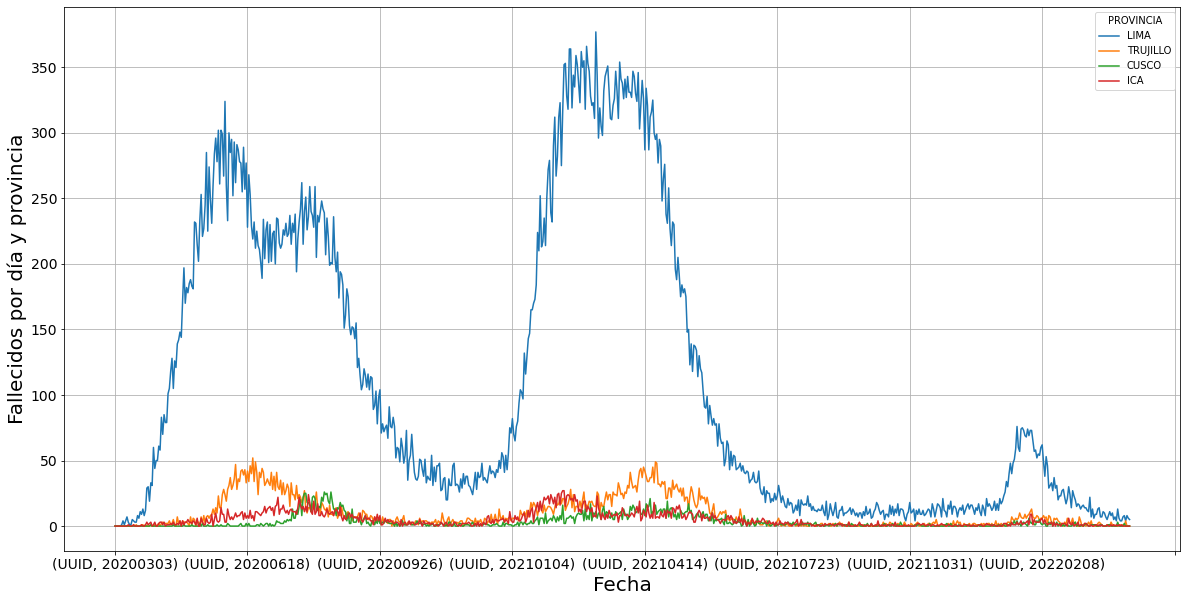

In [15]:
prov = ['LIMA', 'TRUJILLO', 'CUSCO', 'ICA']
ax = df_por_prov[prov].plot(figsize=(20,10), grid=True, fontsize = 14)
ax.set_xlabel('Fecha', fontsize = 20)
ax.set_ylabel('Fallecidos por día y provincia', fontsize = 20);

Text(0, 0.5, 'Total de Fallecidos por día')

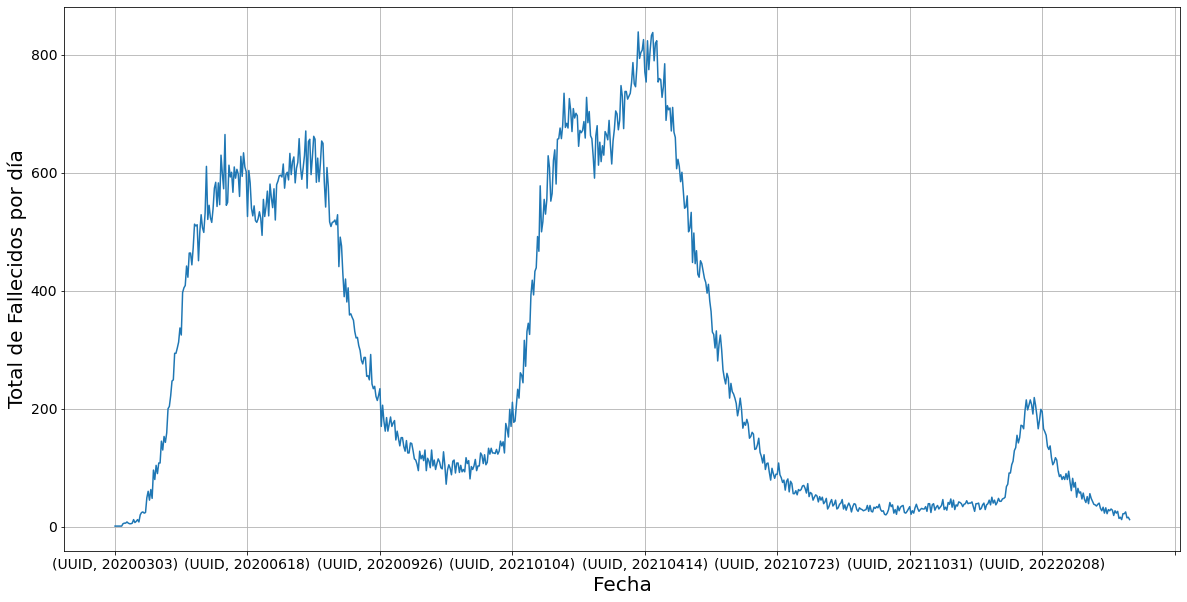

In [16]:
# Evolución diaria de los fallecidos
# df_por_prov.sum(axis=1) es la suma de cada fila
ax = df_por_prov.sum(axis=1).plot(figsize=(20,10), grid=True, fontsize = 14)
ax.set_xlabel('Fecha', fontsize = 20)
ax.set_ylabel('Total de Fallecidos por día', fontsize = 20)

In [19]:
df_fallecidos

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220415,20210512,88,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0
1,20220415,20210401,72,FEMENINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889746.0
2,20220415,20210624,58,MASCULINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0
3,20220415,20210426,84,MASCULINO,Criterio serolÃ³gico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0
4,20220415,20210315,64,MASCULINO,Criterio virolÃ³gico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0
...,...,...,...,...,...,...,...,...,...,...
212614,20220415,20200523,1,MASCULINO,Criterio clÃ­nico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,NaN
212615,20220415,20211003,30,FEMENINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN
212616,20220415,20200918,66,FEMENINO,Criterio radiolÃ³gico,PIURA,MORROPON,LA MATANZA,200404,NaN
212617,20220415,20200510,60,MASCULINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN


In [20]:
df_fallecidos['DIA'] = df_fallecidos['FECHA_FALLECIMIENTO'] % 100

In [21]:
df_fallecidos['DIA']

0         12
1          1
2         24
3         26
4         15
          ..
212614    23
212615     3
212616    18
212617    10
212618     6
Name: DIA, Length: 212619, dtype: int64

In [22]:
df_fallecidos['MES'] = (df_fallecidos['FECHA_FALLECIMIENTO'] // 100) % 100

In [23]:
df_fallecidos['MES']

0          5
1          4
2          6
3          4
4          3
          ..
212614     5
212615    10
212616     9
212617     5
212618     6
Name: MES, Length: 212619, dtype: int64

In [24]:
df_fallecidos['AÑO'] = (df_fallecidos['FECHA_FALLECIMIENTO'] // 100) // 100

In [25]:
df_fallecidos['AÑO']

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
212614    2020
212615    2021
212616    2020
212617    2020
212618    2020
Name: AÑO, Length: 212619, dtype: int64

In [26]:
df_fallecidos

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,DIA,MES,AÑO
0,20220415,20210512,88,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0,12,5,2021
1,20220415,20210401,72,FEMENINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889746.0,1,4,2021
2,20220415,20210624,58,MASCULINO,Criterio virolÃ³gico,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0,24,6,2021
3,20220415,20210426,84,MASCULINO,Criterio serolÃ³gico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0,26,4,2021
4,20220415,20210315,64,MASCULINO,Criterio virolÃ³gico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0,15,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212614,20220415,20200523,1,MASCULINO,Criterio clÃ­nico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,NaN,23,5,2020
212615,20220415,20211003,30,FEMENINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN,3,10,2021
212616,20220415,20200918,66,FEMENINO,Criterio radiolÃ³gico,PIURA,MORROPON,LA MATANZA,200404,NaN,18,9,2020
212617,20220415,20200510,60,MASCULINO,Criterio clÃ­nico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,NaN,10,5,2020


In [28]:
df_fallecidos['EDAD_DECLARADA'].describe()

count    212619.000000
mean         66.313725
std          15.613675
min           0.000000
25%          57.000000
50%          67.000000
75%          78.000000
max         117.000000
Name: EDAD_DECLARADA, dtype: float64

In [29]:
df_por_dist = df_fallecidos[df_fallecidos['PROVINCIA'] == 'LIMA'].pivot_table(index=['DISTRITO'], columns=['FECHA_FALLECIMIENTO'], aggfunc = {'UUID':'count'}, fill_value = 0)
df_por_dist

UUID                                               \
FECHA_FALLECIMIENTO     20200314 20200316 20200317 20200318 20200319 20200320   
DISTRITO                                                                        
ANCON                          0        0        0        0        0        0   
ATE                            0        0        0        0        0        0   
BARRANCO                       0        0        0        0        0        0   
BREÃA                         0        0        0        0        0        0   
CARABAYLLO                     0        0        0        0        0        0   
CHACLACAYO                     0        0        0        0        0        0   
CHORRILLOS                     0        0        0        0        0        0   
CIENEGUILLA                    0        0        0        0        0        0   
COMAS                          0        0        0        0        0        0   
EL AGUSTINO                    0        0        0        1        0        0   
INDEPENDENCIA                  0        0        0        0        0        0   
JESUS MARIA                    0        0        0        0        0        0   
LA MOLINA                      0        0        0        0        0        0   
LA VICTORIA                    0        0        0        0        1        0   
LIMA                           0        1        0        1        1        2   
LINCE                          0        0        0        0        0        0   
LOS OLIVOS                     1        0        0        0        0        0   
LURIGANCHO                     0        0        0        0        0        0   
LURIN                          0        0        0        0        0        0   
MAGDALENA DEL MAR              0        0        0        0        0        0   
MIRAFLORES                     0        0        0        0        1        0   
PACHACAMAC                     0        0        1        0        0        0   
PUCUSANA                       0        0        0        0        0        0   
PUEBLO LIBRE                   0        0        0        0        0        0   
PUENTE PIEDRA                  0        0        0        0        0        0   
PUNTA HERMOSA                  0        0        0        0        0        0   
PUNTA NEGRA                    0        0        0        0        0        0   
RIMAC                          0        0        0        0        1        0   
SAN BARTOLO                    0        0        0        0        0        0   
SAN BORJA                      0        0        0        0        0        0   
SAN ISIDRO                     0        0        0        0        0        0   
SAN JUAN DE LURIGANCHO         0        0        0        0        0        1   
SAN JUAN DE MIRAFLORES         0        1        0        0        0        0   
SAN LUIS                       0        0        0        0        0        0   
SAN MARTIN DE PORRES           0        0        0        0        0        0   
SAN MIGUEL                     0        0        0        0        0        0   
SANTA ANITA                    0        0        0        0        0        0   
SANTA MARIA DEL MAR            0        0        0        0        0        0   
SANTA ROSA                     0        0        0        0        0        0   
SANTIAGO DE SURCO              0        0        0        0        1        0   
SURQUILLO                      0        0        0        0        0        0   
VILLA EL SALVADOR              0        2        0        0        2        0   
VILLA MARIA DEL TRIUNFO        0        0        0        2        0        0   

                                                             ...           \
FECHA_FALLECIMIENTO     20200321 20200322 20200323 20200324  ... 20220406   
DISTRITO                                                     ...            
ANCON                          0        0        0        1  ...      

In [30]:
df_por_dist = df_por_dist.transpose()
df_por_dist

DISTRITO                  ANCON  ATE  BARRANCO  BREÃA  CARABAYLLO  \
     FECHA_FALLECIMIENTO                                             
UUID 20200314                 0    0         0       0           0   
     20200316                 0    0         0       0           0   
     20200317                 0    0         0       0           0   
     20200318                 0    0         0       0           0   
     20200319                 0    0         0       0           0   
...                         ...  ...       ...     ...         ...   
     20220411                 0    0         0       0           0   
     20220412                 0    1         0       0           0   
     20220413                 0    0         0       0           1   
     20220414                 0    0         0       0           0   
     20220415                 0    0         0       0           0   

DISTRITO                  CHACLACAYO  CHORRILLOS  CIENEGUILLA  COMAS  \
     FECHA_FALLECIMIENTO                                               
UUID 20200314                      0           0            0      0   
     20200316                      0           0            0      0   
     20200317                      0           0            0      0   
     20200318                      0           0            0      0   
     20200319                      0           0            0      0   
...                              ...         ...          ...    ...   
     20220411                      0           0            0      0   
     20220412                      0           0            0      0   
     20220413                      0           0            0      1   
     20220414                      1           0            0      0   
     20220415                      0           0            0      0   

DISTRITO                  EL AGUSTINO  ...  SAN LUIS  SAN MARTIN DE PORRES  \
     FECHA_FALLECIMIENTO               ...                                   
UUID 20200314                       0  ...         0                     0   
     20200316                       0  ...         0                     0   
     20200317                       0  ...         0                     0   
     20200318                       1  ...         0                     0   
     20200319                       0  ...         0                     0   
...                               ...  ...       ...                   ...   
     20220411                       0  ...         0                     1   
     20220412                       0  ...         0                     0   
     20220413                       0  ...         0                     1   
     20220414                       0  ...         0                     0   
     20220415                       0  ...         0                     0   

DISTRITO                  SAN MIGUEL  SANTA ANITA  SANTA MARIA DEL MAR  \
     FECHA_FALLECIMIENTO                                                 
UUID 20200314                      0            0                    0   
     20200316                      0            0                    0   
     20200317                      0            0                    0   
     20200318                      0            0                    0   
     20200319                      0            0                    0   
...                              ...          ...                  ...   
     20220411                      0            0                    0   
     20220412                      0            0                    0   
     20220413                      0            0                    0   
     20220414                      0            0                    0   
     20220415                      0            0                    0   

DISTRITO                  SANTA ROSA  SANTIAGO DE SURCO  SURQUILLO  \
     FECHA_FALLECIMIENTO                                             
UUID 20200314                     

In [31]:
df_por_dist.index

MultiIndex([('UUID', 20200314),
            ('UUID', 20200316),
            ('UUID', 20200317),
            ('UUID', 20200318),
            ('UUID', 20200319),
            ('UUID', 20200320),
            ('UUID', 20200321),
            ('UUID', 20200322),
            ('UUID', 20200323),
            ('UUID', 20200324),
            ...
            ('UUID', 20220406),
            ('UUID', 20220407),
            ('UUID', 20220408),
            ('UUID', 20220409),
            ('UUID', 20220410),
            ('UUID', 20220411),
            ('UUID', 20220412),
            ('UUID', 20220413),
            ('UUID', 20220414),
            ('UUID', 20220415)],
           names=[None, 'FECHA_FALLECIMIENTO'], length=762)

Text(0, 0.5, 'Total de Fallecidos por día y por distrito')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


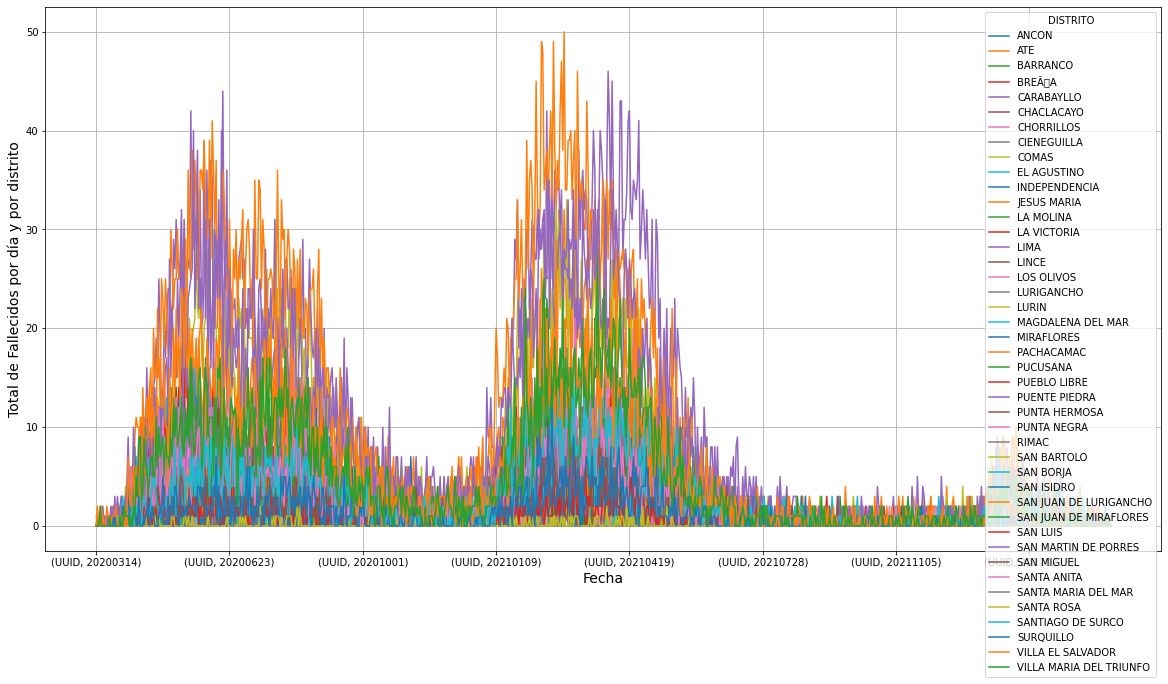

In [32]:
# Todos los distritos
ax = df_por_dist.plot(figsize=(20,10), grid=True)
ax.set_xlabel('Fecha', fontsize = 14)
ax.set_ylabel('Total de Fallecidos por día y por distrito', fontsize = 14)

Text(0, 0.5, 'Total de Fallecidos por día y por distrito')

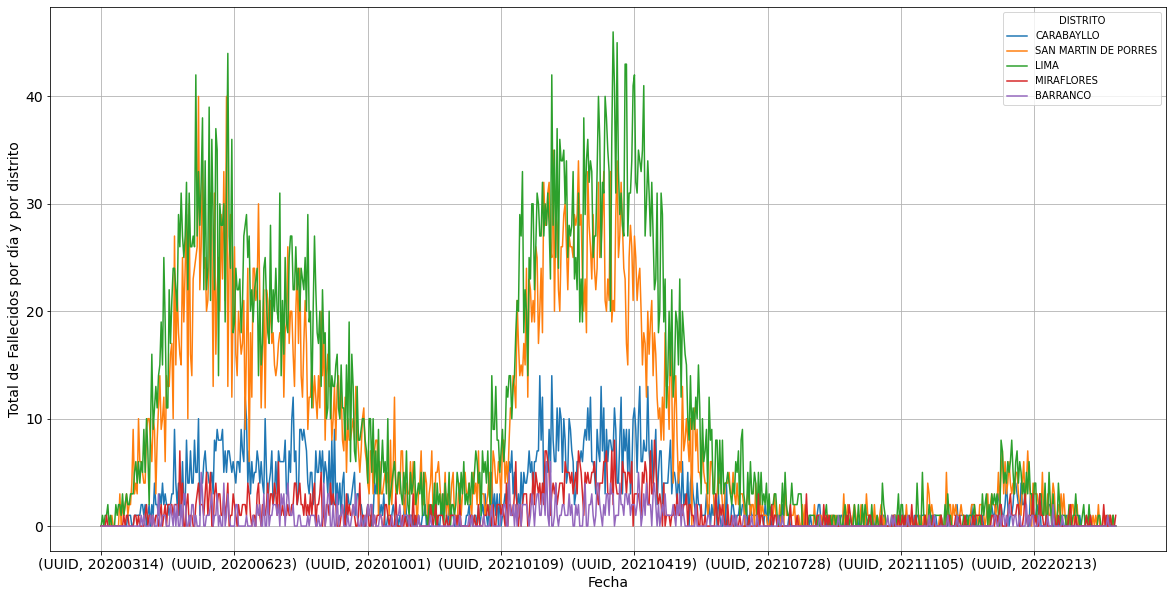

In [33]:
# Atravesando Lima de Norte a Sur
dist = ['CARABAYLLO', 'SAN MARTIN DE PORRES', 'LIMA', 'MIRAFLORES', 'BARRANCO']
ax = df_por_dist[dist].plot(figsize=(20,10), grid=True, fontsize = 14)
ax.set_xlabel('Fecha', fontsize = 14)
ax.set_ylabel('Total de Fallecidos por día y por distrito', fontsize = 14)

In [39]:
# revisando nuevamente
df_por_prov

PROVINCIA                 ABANCAY  ACOBAMBA  ACOMAYO  AIJA  ALTO AMAZONAS  \
     FECHA_FALLECIMIENTO                                                    
UUID 20200303                   0         0        0     0              0   
     20200304                   0         0        0     0              0   
     20200307                   0         0        0     0              0   
     20200308                   0         0        0     0              0   
     20200311                   0         0        0     0              0   
...                           ...       ...      ...   ...            ...   
     20220411                   0         1        0     0              0   
     20220412                   0         0        0     0              0   
     20220413                   0         0        0     0              0   
     20220414                   0         0        0     0              0   
     20220415                   0         0        0     0              0   

PROVINCIA                 AMBO  ANDAHUAYLAS  ANGARAES  ANTA  ANTABAMBA  ...  \
     FECHA_FALLECIMIENTO                                                ...   
UUID 20200303                0            0         0     0          0  ...   
     20200304                0            0         0     0          0  ...   
     20200307                0            0         0     0          0  ...   
     20200308                0            0         0     0          0  ...   
     20200311                0            0         0     0          0  ...   
...                        ...          ...       ...   ...        ...  ...   
     20220411                0            0         0     0          0  ...   
     20220412                0            0         0     0          0  ...   
     20220413                0            0         0     0          0  ...   
     20220414                0            1         0     0          0  ...   
     20220415                0            0         0     0          0  ...   

PROVINCIA                 UTCUBAMBA  VICTOR FAJARDO  VILCAS HUAMAN  VIRU  \
     FECHA_FALLECIMIENTO                                                   
UUID 20200303                     0               0              0     0   
     20200304                     0               0              0     0   
     20200307                     0               0              0     0   
     20200308                     0               0              0     0   
     20200311                     0               0              0     0   
...                             ...             ...            ...   ...   
     20220411                     0               0              0     0   
     20220412                     0               0              0     0   
     20220413                     0               0              0     0   
     20220414                     0               0              0     0   
     20220415                     0               1              0     1   

PROVINCIA                 YAROWILCA  YAULI  YAUYOS  YUNGAY  YUNGUYO  ZARUMILLA  
     FECHA_FALLECIMIENTO                                                        
UUID 20200303                     0      0       0       0        0          0  
     20200304                     0      0       0       0        0          0  
     20200307                     0      0       0       0        0          0  
     20200308                     0      0       0       0        0          0  
     20200311                     0      0       0       0        0          0  
...                             ...    ...     ...     ...      ...        ...  
     20220411                     0      0       0       0        0          0  
     20220412                     0      1       0       1        0          0  
     20220413                     0      0       0       0        1          0  
     20220414                     0      1       0       0        0          0  
     2022

In [40]:
# Eliminar el multindex
df_por_prov = df_por_prov.reset_index()
df_por_prov

PROVINCIA,level_0,FECHA_FALLECIMIENTO,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
0,UUID,20200303,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,UUID,20200304,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UUID,20200307,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,UUID,20200308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,UUID,20200311,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,UUID,20220411,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,UUID,20220412,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
764,UUID,20220413,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
765,UUID,20220414,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
df_por_prov = df_por_prov.drop(columns=['level_0'])

In [44]:
df_por_prov

PROVINCIA,FECHA_FALLECIMIENTO,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,ANTA,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
0,20200303,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20200304,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20200307,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20200308,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20200311,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,20220411,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,20220412,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
764,20220413,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
765,20220414,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df_por_prov['FECHA_FALLECIMIENTO']

0      20200303
1      20200304
2      20200307
3      20200308
4      20200311
         ...   
762    20220411
763    20220412
764    20220413
765    20220414
766    20220415
Name: FECHA_FALLECIMIENTO, Length: 767, dtype: int64

In [46]:
# Llevando a fecha
def to_date_str(txt):
    return txt[6:8] +'/'+txt[4:6] + '/'+ txt[0:4]

to_date_str('20220411')

'11/04/2022'

In [47]:
#Llevando a string, dicho string a fecha
df_por_prov['FECHA_FALLECIMIENTO'] = df_por_prov['FECHA_FALLECIMIENTO'].apply(str).apply(to_date_str)
df_por_prov['FECHA_FALLECIMIENTO']

0      03/03/2020
1      04/03/2020
2      07/03/2020
3      08/03/2020
4      11/03/2020
          ...    
762    11/04/2022
763    12/04/2022
764    13/04/2022
765    14/04/2022
766    15/04/2022
Name: FECHA_FALLECIMIENTO, Length: 767, dtype: object

In [48]:
# Llevando a date
df_por_prov['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_por_prov['FECHA_FALLECIMIENTO'], format='%d/%m/%Y')
df_por_prov['FECHA_FALLECIMIENTO']

0     2020-03-03
1     2020-03-04
2     2020-03-07
3     2020-03-08
4     2020-03-11
         ...    
762   2022-04-11
763   2022-04-12
764   2022-04-13
765   2022-04-14
766   2022-04-15
Name: FECHA_FALLECIMIENTO, Length: 767, dtype: datetime64[ns]

In [ ]:
df_por_prov

In [49]:
# reindexando
df_por_prov = df_por_prov.set_index('FECHA_FALLECIMIENTO') #, inplace = True)
df_por_prov

PROVINCIA,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,ANTA,ANTABAMBA,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
FECHA_FALLECIMIENTO,,,,,,,,,,,,,,,,,,,,,
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2022-04-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# Se agrega los dias faltantes para una frecuencia diaria 
df_por_prov = df_por_prov.asfreq('D')
df_por_prov

PROVINCIA,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,ANTA,ANTABAMBA,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
FECHA_FALLECIMIENTO,,,,,,,,,,,,,,,,,,,,,
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2022-04-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Se confirma que los índices fecha este completos
# Verificar que un índice temporal está completo
# ==============================================================================
(df_por_prov.index == pd.date_range(
                    start = df_por_prov.index.min(),
                    end   = df_por_prov.index.max(),
                    freq  = df_por_prov.index.freq)
).all()

True

In [52]:
df_por_prov.shape

(774, 196)

In [53]:
items = df_por_prov.shape[0]
items

774

In [54]:
entrenamiento = df_por_prov[:items//2]
entrenamiento

PROVINCIA,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,ANTA,ANTABAMBA,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
FECHA_FALLECIMIENTO,,,,,,,,,,,,,,,,,,,,,
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-20,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2.0
2021-03-21,3.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-03-22,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
pruebas = df_por_prov[items//2:]
pruebas

PROVINCIA,ABANCAY,ACOBAMBA,ACOMAYO,AIJA,ALTO AMAZONAS,AMBO,ANDAHUAYLAS,ANGARAES,ANTA,ANTABAMBA,...,UTCUBAMBA,VICTOR FAJARDO,VILCAS HUAMAN,VIRU,YAROWILCA,YAULI,YAUYOS,YUNGAY,YUNGUYO,ZARUMILLA
FECHA_FALLECIMIENTO,,,,,,,,,,,,,,,,,,,,,
2021-03-25,2.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,3.0,0.0,...,1.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0
2021-03-26,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2021-03-27,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
2021-03-28,1.0,0.0,0.0,1.0,3.0,0.0,3.0,2.0,3.0,1.0,...,1.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0
2021-03-29,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2022-04-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
print(f"Fechas Entrenamiento : desde {entrenamiento.index.min()} hasta {entrenamiento.index.max()}  (n={len(entrenamiento)})")
print(f"Fechas Pruebas  : desde {pruebas.index.min()} hasta {pruebas.index.max()}  (n={len(pruebas)})")

Fechas Entrenamiento : desde 2020-03-03 00:00:00 hasta 2021-03-24 00:00:00  (n=387)
Fechas Pruebas  : desde 2021-03-25 00:00:00 hasta 2022-04-15 00:00:00  (n=387)


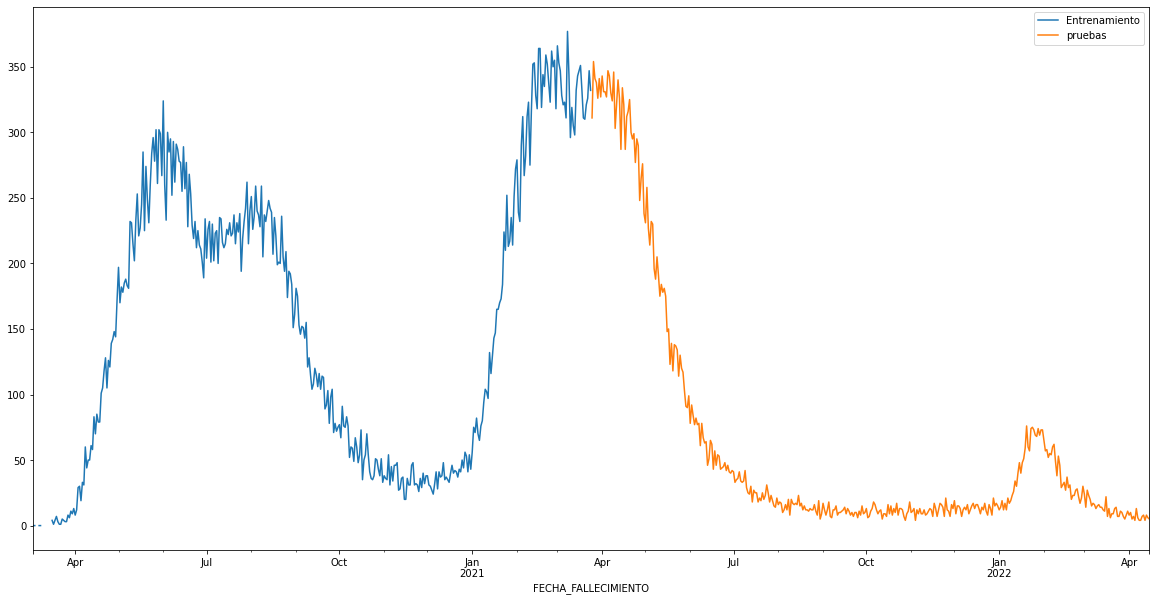

In [59]:
import matplotlib.pyplot as plt
# Solo Lima
fig, ax = plt.subplots(figsize=(20, 10))
entrenamiento['LIMA'].plot(ax=ax, label='Entrenamiento')
pruebas['LIMA'].plot(ax=ax, label='pruebas')
ax.legend();

In [ ]:
-